In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random,math

In [26]:
df=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Logistic_Regression/Classification_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
a=df.shape[0]-1000
x_train=np.array(df.iloc[0:a,1:])
y_train=np.array(df.iloc[0:a,0:1])
x_val=np.array(df.iloc[a:,1:])
y_val=np.array(df.iloc[a:,0:1])
#x_val=np.array(df.iloc[a-1000:a,1:])
#y_val=np.array(df.iloc[a-1000:a,0:1])
x_train.shape,y_train.shape

((29000, 784), (29000, 1))

In [28]:
y_val = y_val.reshape(-1)

In [29]:
y_val.shape

(1000,)

In [30]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.unique(x_train[0])

array([  0,   7,  18,  21,  32,  42,  50,  53,  56,  57,  64,  71,  74,
        85,  89,  96, 110, 113, 117, 124, 138, 142, 149, 159, 166, 170,
       180, 184, 191, 198, 202, 219, 223, 234, 255])

In [32]:
img = np.stack([x_train[0].reshape(28,28),x_train[0].reshape(28,28),x_train[0].reshape(28,28)],axis=-1)

In [33]:
y_train.dtype

dtype('int64')

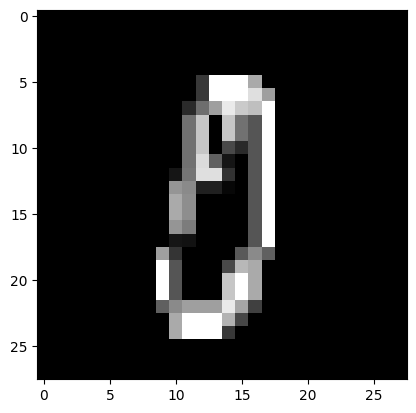

In [34]:
plt.imshow(x_train[0].reshape(28,28),cmap="gray")

In [35]:
class Logisitic_Regression:
  def __init__(self, X, Y, learning_rate, iterations=1000, lambda_regularization=0.1, normalization=True):
    Y = self.update_y(Y)
    self.w = np.zeros((X.shape[1],Y.shape[1]))
    self.b = np.zeros(Y.shape[1])
    self.lambda_reg = lambda_regularization
    self.norm = normalization
    self.J_history = []
    self.Train(X, Y, learning_rate, iterations)

  def update_y(self,Y):
    features = np.unique(y_train).shape[0]
    template = np.arange(0,features)
    Y1 = np.where((Y==template),1,0)
    print(Y1.shape)
    return Y1

  def sigmoid(self,a):
    #print("s",np.unique((1/(1+np.exp(-a)))))
    return 1/(1+np.exp(-a))

  def Normalization(self, X):
    self.mu = np.mean(X,axis=0)
    self.sigma = np.std(X,axis=0)+1
    if self.norm:
        X1 = (X - self.mu) / self.sigma
    else:
        X1 = X
    #print(pd.DataFrame(X1[0:,0:]))
    #print("mu: ",self.mu)
    #print("sigma: ",self.sigma)
    return X1

  def Gradient(self, X1, Y):
    m, n = X1.shape
    dj_dw = np.zeros((n,Y.shape[0]))
    dj_db = 0
    #error = np.dot(X1, self.w) + self.b - Y
    dj_dw = (np.dot((self.sigmoid(np.dot(X1, self.w) + self.b ) - Y).T, X1) + self.lambda_reg * self.w.T) / m
    dj_dw = dj_dw.T
    dj_db = (np.sum((self.sigmoid(np.dot(X1, self.w) + self.b ) - Y),axis=0))/ m
    return dj_dw, dj_db

  def Gradient_descent(self, X1, Y, learning_rate, iterations):
    for i in range(iterations):
      dj_dw, dj_db = self.Gradient(X1, Y)
      self.b -= learning_rate * dj_db
      self.w -= learning_rate * dj_dw
      if i % math.ceil(iterations / 10) == 0:
        self.J_history.append([self.Cost_function(X1, Y),i])
        print(f"Iteration {i:4}: Cost {self.J_history[-1][0]}")
    return self.J_history

  def Cost_function(self, X1, Y):
    f_wb = self.sigmoid(np.dot(X1, self.w) + self.b)
    loss = -Y*(np.log(f_wb)) - (1-Y)*(np.log(1-f_wb))
    m = X1.shape[0]
    regularization_term = (self.lambda_reg / (2 * m)) * np.sum(self.w**2,axis=0)
    cost = np.sum(loss,axis=0) / m + regularization_term
    return cost

  def Train(self, X, Y, learning_rate, iterations):
    X1 = self.Normalization(X)
    self.J_history = self.Gradient_descent(X, Y, learning_rate, iterations)
    #print("weights:",self.w.reshape(1,-1),sep="\n")
    #print("bias:",self.b)
    self.Plot_cost()

  def evaluate(self, X_test_data):
    if self.norm:
      X_test_data_norm = (X_test_data - self.mu) / self.sigma
    else:
      X_test_data_norm = X_test_data
    Y = self.sigmoid(np.dot(X_test_data_norm, self.w) + self.b)
    Y = np.argmax(Y,axis=1)
    return Y

  def accuracy(self, X_test,Y_test):
    Y_pred = self.evaluate(X_test)
    #(1 - (np.sum((Y_test - Y_pred)**2)) / (np.sum((Y_test - np.mean(Y_test))**2)))
    output = np.where((Y_pred == Y_test),1,0)
    i,count  = np.unique(np.where((Y_pred == Y_test),1,0), return_counts=True)
    accuracy = count[np.where(i == 1)[0][0]] / np.sum(count)
    print("accuracy: ", accuracy)
    return output

  def Plot_cost(self):
    J=self.J_history
    J = np.array(J,dtype = object)
    costs= np.array(J[:,0].tolist()).T
    iters=J[:,1]
    for i in range(iters.shape[0]):
      plt.plot(iters,costs[i],label= f"feature {i}")
    plt.legend()
    plt.ylabel("Cost")
    plt.xlabel("Iterations")

  def Plot_image(i,X):
    print(plt.imshow(X[i].reshape(28,28),cmap="gray"))

(29000, 10)
Iteration    0: Cost [3.53488364 2.97483257 2.77479926 3.03649426 3.05550837 3.67350935
 2.70662132 2.84526408 3.04802588 2.85944147]
Iteration  100: Cost [0.04039627 0.01941862 0.01025039 0.06221169 0.03056469 0.04527138
 0.03522386 0.06397737 0.01826876 0.02139569]
Iteration  200: Cost [0.0366519  0.01653991 0.00823759 0.05886394 0.02781524 0.03935784
 0.03264675 0.05911339 0.01563646 0.01860758]
Iteration  300: Cost [0.03468625 0.01505715 0.00739881 0.05707116 0.02634059 0.03623818
 0.0313092  0.05701628 0.01420248 0.01722978]
Iteration  400: Cost [0.03339294 0.01404638 0.00684792 0.05587224 0.02534891 0.03417772
 0.03037934 0.05562427 0.01320937 0.01630691]
Iteration  500: Cost [0.03245417 0.01328322 0.00643299 0.05498402 0.02461041 0.03266337
 0.02966882 0.05460832 0.01245822 0.01561669]
Iteration  600: Cost [0.03173073 0.01267342 0.00610461 0.0542843  0.02402692 0.03147796
 0.02909633 0.05382238 0.01186074 0.01506771]
Iteration  700: Cost [0.03114953 0.01216792 0.0058

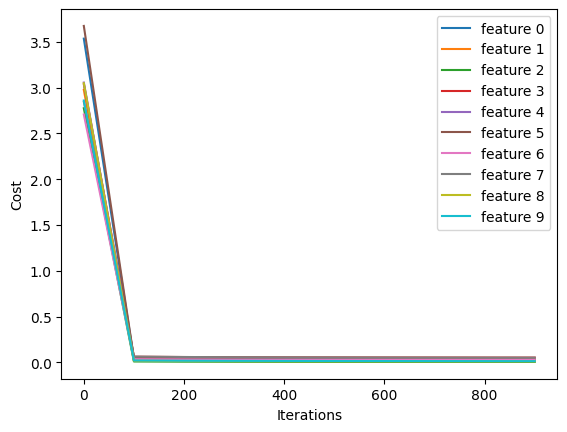

In [36]:
model = Logisitic_Regression(x_train, y_train, 0.0001, 1000, lambda_regularization=0.1, normalization=False)

In [37]:
model.accuracy(x_val,y_val)

accuracy:  0.973


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
df1=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Logistic_Regression/Classification_test.csv')
df1

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,18563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x_test=np.array(df1.iloc[:,1:])
id = np.array(df1.iloc[:,0])

In [40]:
y_test=model.evaluate(x_test).reshape(-1)
y_test.shape

(10000,)

In [41]:
submission = pd.DataFrame({"Id":id , "Output":y_test})
submission

,Id,Output
0,15795,0
1,860,4
2,5390,5
3,11964,5
4,11284,7
...,...,...
9995,11260,9
9996,18563,9
9997,634,0
9998,10057,8


In [42]:
submission.to_csv("/content/drive/MyDrive/WOC_6.0/Logistic_Regression/Submission_logistic.csv")